# Programming in Python, 1TD327, 5hp

Lecture 4: Dictionary, File, matplotlib

- Cheng Gong
- Email: cheng.gong@it.uu.se
- Office: ITC 2448

<br>


Source available: [github.com/enigne/ProgramminginPython](https://github.com/enigne/ProgramminginPython)

## Last week

1. Good style vs. Bad style
    - use loop vs. copy & paste
    - use varibales vs. use constant values
2. Lists
3. Strings
4. Classes, objects and methods
5. Testing

### About Lesson 6
- It is easy to get the same results as in the examples, but that is not enough to say the code works. You need to test with more complicated examples. 
- No `if` statements, but also no `while`
- Use list comprehension.

In [1]:
import statistics

def smooth_b(x, n):
    return [statistics.mean(x[max(0,i-n): min(i+n+1, len(x))])
            for i in range(len(x))]   

In [2]:
def smooth_a(x, n):
        return [ sum(x[max(0,i-n): min(i+n+1, len(x))] + 
                     [x[0]] * max(0, n-i) + 
                     [x[-1]] * max(0, i+n+1-len(x)))
                /(2*n+1) for i in range(len(x))]   

## Today

1. Dictionary
2. File I/O
3. matplotlib
4. numpy, scipy, pandas

### Dictionary

- A python dictionary is like a list, but it is an unordered collection of items, whose indices are not necessarily numbers. 
- The index is called `keys` and can be numbers, strings, and many other data types.
- A dictionary has a `key`:`value` pair. For each key, the dictionary holds a value. A dictionary is created by using `{}`

#### Create a dictionary

In a dictionary, a key and a value always appear in pairs.

Quiz: How many of these are valid Python dictionary declaration?

``` python 
my_d1 = {}
my_d2 = {1: 'apple', 2: 'banana'}
my_d3 = dict({'apple':1, 'banana':2})
my_d4 = dict([(1,'apple'), (2,'banana')])
my_d5 = {'name': 'Cheng Gong', 1: [2, 4, 3]}
```

**A**. 1, **B**. 2, **C**. 3, **D**. 4, **E**. 5

In [3]:
my_d1 = {}; print(my_d1)

{}


In [4]:
my_d2 = {1: 'apple', 2: 'banana'}; print(my_d2)

{1: 'apple', 2: 'banana'}


In [5]:
my_d3 = dict({'apple':1, 'banana':2}); print(my_d3)

{'apple': 1, 'banana': 2}


In [6]:
my_d4 = dict([(1,'apple'), (2,'banana')]); print(my_d4)

{1: 'apple', 2: 'banana'}


In [7]:
my_d5 = {'name': 'Cheng Gong', 1: [2, 4, 3]}; print(my_d5)

{'name': 'Cheng Gong', 1: [2, 4, 3]}


#### Access elements in the dictionary

Python dictionary uses `key`s to access elements. A `key` can be used either inside the square bracket or with the `get()` method.

In [8]:
print(my_d5)

{'name': 'Cheng Gong', 1: [2, 4, 3]}


In [9]:
print(my_d5['name'])

Cheng Gong


In [10]:
print(my_d5[1])

[2, 4, 3]


In [11]:
print(my_d5.get('name'))

Cheng Gong


Quiz: How many errors will you get?
``` python
print(my_d5['1'])
print(my_d5.get('1'))
print(my_d5[])
print(my_d5.get())
print(my_d5['Cheng Gong'])
```

**A**. 1, **B**. 2, **C**. 3, **D**. 4, **E**. 5

``` python
print(my_d5['1'])
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-18-5ef40add46a2> in <module>
----> 1 print(my_d5['1'])

KeyError: '1'
```

In [12]:
print(my_d5.get('1'))

None


#### Change or add elements in a dictionary

If the `key` already exists in the dictionary, its `value` will be updated, otherwise a new `key`:`value` pair will be added to the dictionary.

In [13]:
my_d5['address'] = 'Polacksbacken'
print(my_d5)

{'name': 'Cheng Gong', 1: [2, 4, 3], 'address': 'Polacksbacken'}


In [14]:
my_d5['address'] = 'ITC'
print(my_d5)

{'name': 'Cheng Gong', 1: [2, 4, 3], 'address': 'ITC'}


#### Remove or delete elements from a dictionary

- Remove a particular item in a dictionary by using the method `pop()`. This method removes as item with the provided key and returns the value.
- The method `popitem()` can be used to remove and return an arbitrary pair `(key, value)` from the dictionary. 
- The method `clear()` removes all the items from the dictionary.
- The keyword `del` can be used to remove individual items or the entire dictionary itself.

In [15]:
print(my_d5.pop(1))
print(my_d5)

[2, 4, 3]
{'name': 'Cheng Gong', 'address': 'ITC'}


In [16]:
print(my_d5.popitem())
print(my_d5)

('address', 'ITC')
{'name': 'Cheng Gong'}


In [17]:
del my_d5['name']
print(my_d5)

{}


#### Dictionary methods

The `dict` class contains a few more methods, for instance `keys()`, `values()`, `key in d`, etc. Read the full list of the [**dict methods**](https://docs.python.org/3/library/stdtypes.html#typesmapping).

In [18]:
nations = ['Sweden', 'Norway', 'Finland']
popus = [10.3, 5.3, 5.5]
dict_population = dict(zip(nations, popus))
print(dict_population)

{'Sweden': 10.3, 'Norway': 5.3, 'Finland': 5.5}


In [19]:
print(dict_population.items())

dict_items([('Sweden', 10.3), ('Norway', 5.3), ('Finland', 5.5)])


In [20]:
print(dict_population.keys())

dict_keys(['Sweden', 'Norway', 'Finland'])


In [21]:
print(dict_population.values())

dict_values([10.3, 5.3, 5.5])


#### Dictionary Comprehension

Similar as list comprehension, dictionary comprehension is an elegant and concise way to create new dictionary from an iterable in Python.

In [22]:
my_d6 = {nations[n]:popus[n] for n in range(len(nations))}
print(my_d6)

{'Sweden': 10.3, 'Norway': 5.3, 'Finland': 5.5}


### File I/O

####  Open a file

- Python has a built-in function `open()` to open a file. This function returns a `file` object, as it is used to read or modify the file accordingly.
- `open()` has some optional arguments: `mode='rt'`, `encoding=None`, etc.
- Because of the encoding are different on Window, Linux, and Mac. It is highly recommanded to specify the encoding tpye when working with text mode.

| Mode 	| Description                                                                                               	|
|:----:	|-----------------------------------------------------------------------------------------------------------	|
|  'r' 	| Open a file for reading. (default)                                                                        	|
|  'w' 	| Open a file for writing. Creates a new file if it does not exist or truncates the file if it exists.      	|
|  'x' 	| Open a file for exclusive creation. If the file already exists, the operation fails.                      	|
| 'a'  	| Open for appending at the end of the file without truncating it. Creates a new file if it does not exist. 	|
| 't'  	| Open in text mode. (default)                                                                              	|
| 'b'  	| Open in binary mode.                                                                                      	|
| '+'  	| Open a file for updating (reading and writing)                                                            	|

Read more explainations on the [offical document](https://docs.python.org/3/library/functions.html#open)

In [23]:
f = open('Lecture4.ipynb')

In [24]:
f = open('Lecture4.ipynb','rt')

In [25]:
f = open('Lecture4.ipynb','r+t',encoding = 'utf-8')

####  Close a file

- After the operations to the file, we **have to close the file properly** with the `close()` method.
- Closing a file will free the memory that were tied with the file
- Python has an automatic garbage collector to clean up unreferenced objects, but we must not rely on it to close the file.

- One way is to have `open()` and `close()` in pairs. **However, this method is not entirely safe.**
For example:

In [26]:
f = open('Lecture4.ipynb','r+t',encoding = 'utf-8')
# perform some operations
f.close()

- If an exception occurs when we are performing some operations with the file, the code exits without closing the file.

##### __The best way is to use `with` statement__

```python
with open('Lecture4.ipynb','r+t',encoding = 'utf-8') as f:
    # perform some operations
```

This ensures that the file is closed when the block inside `with` exits and we don't need to explicitly call the `close()` method. It is done internally.

####  Read/Write

- The methods `read()` and `readline()` require the file object opened with `'r'`.
- The methods `write()` and `writeline()` require the file object opened with `'w'`, `'a'` or `'x'`.


More details are in: [Methods of File Objects](https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects)

####  Other types ---- CSV

The **CSV** (Comma Separated Values) format is the most common import and export format for spreadsheets and databases. 

More details are available in the official document of [csv module](https://docs.python.org/3/library/csv.html#module-csv).


##### Read CSV
we use `csv.reader()` module to read the csv file. 

Example file `people.csv`
``` 
No, Name, country
1, Alex, USA
2, Erik, Sweden
3, Cheng, China
```

In [27]:
import csv

with open('people.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        print(row)

['No', ' Name', ' country']
['1', ' Alex', ' USA']
['2', ' Erik', ' Sweden']
['3', ' Cheng', ' China']


Use list/dictionary comprehension to put the data into a list/dictionary.

Example:

In [28]:
import csv

with open('people.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    next(reader, None)  # skip the headers
    people_dict = {row[1]: row[2] for row in reader}

print(people_dict)

{' Alex': ' USA', ' Erik': ' Sweden', ' Cheng': ' China'}


### Matplotlib


- [Matplotlib](https://matplotlib.org/) is the most popular Python module for plotting.  It offers many customization options, and similar plotting functionnalities as Matlab. 

- You might need to install this module on your computer, the installation instruction is [here](https://matplotlib.org/faq/installing_faq.html#installation). _If there is any problem with the installation, do not hesitate to ask the teacher._

- The most common way to learn matplotli is from examples and [tutorials](https://matplotlib.org/tutorials/index.html#)

- Some official examples of `matplotlib` are available [here](https://matplotlib.org/tutorials/introductory/sample_plots.html) and [there](https://matplotlib.org/gallery/index.html).


In [29]:
import matplotlib.pyplot as plt
plt.show()

#### Example 1: The first plot

A figure of the voltage changes in time. $V=\sin{\frac{2\pi t}{L}}$ with $t\in[0,L)$ and $L=100$.

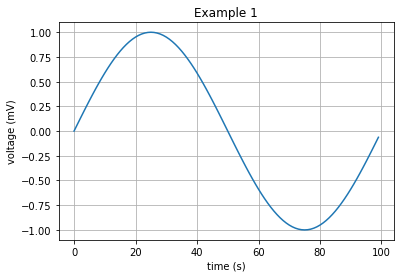

In [30]:
import matplotlib.pyplot as plt
from math import pi,sin
L = 100
time = list(range(L))
Voltage = [sin(2*pi*t/L) for t in time]
fig, ax = plt.subplots()
ax.plot(time, Voltage)
ax.set(xlabel='time (s)', ylabel='voltage (mV)', title='Example 1')
ax.grid()
fig.savefig("test.png")
plt.show()

* `import matplotlib.pyplot as plt` to use the plot functions from `matplotlib` module and rename it to `plt`.
* `fig, ax = plt.subplots` sets up the figure's frame.
* `ax.plot(time, Voltage)` plots the the data contained in `time` and `Voltage`. These are `lists`, but can also be 'arraies', which will be covered later during the course.
* `ax.set(xlabel='time (s)', ylabel='voltage (mV)', title='Example 1')` sets the labels for each axis, as well as the title of the figure.
* `ax.grid()` turns on the grid in the figure, useful when you need to read values from the curve.
* `fig.savefig("test.png")` saves the figure to a `.png` files. `Matplotlib` supports many other formats. In particular, it supports vector graphics (`.pdf`, `.eps`, `.svg`), which are usually of better quality than bitmap formats (`.png` and `.jpg`).
* `plt.show()` displays the figure in a new window.

#### Example 2: Change some feature

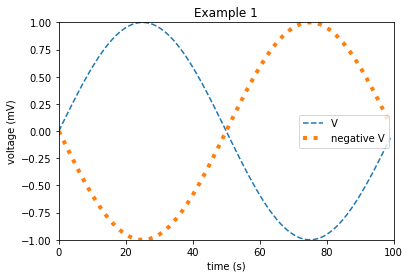

In [31]:
fig, ax = plt.subplots()
negV = [-v for v in Voltage]
ax.plot(time, Voltage, color='C0', linestyle='--', label='V')
ax.plot(time, negV, color='C1', linestyle=':', linewidth=4, label='negative V')
ax.set(xlabel='time (s)', ylabel='voltage (mV)', title='Example 1')
ax.set(xlim=[0,100], ylim=[-1,1])
ax.legend()
plt.show()

* In `plot`, the optional argument `color` changes the color of the line. One commonly used set of colors is from `'C0'` to `'C9'`. Learn more in [matplotlib color](https://matplotlib.org/3.1.1/tutorials/colors/colors.html).
* Another optional argument is `linestyle` or `ls`, learn more in [linestyles](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html).
* The width of the line is controlled by `linewidth` or `lw`.
* The optional aargument `label` is used to set the names shown in the legend.
* You can control the domain of the figure by set `xlim` and `ylim`.

#### Example 3: The scatter plot

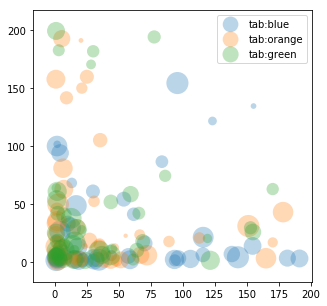

In [32]:
import matplotlib.pyplot as plt
import random

random.seed(20191126)
fig, ax = plt.subplots(figsize=(5, 5))
N = 50
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    x = [200**random.random() for i in range(N)]
    y = [200**random.random() for i in range(N)]
    scale = [500*random.random() for i in range(N)]
    ax.scatter(x,y,s=scale,c=color,label=color,alpha=0.3,edgecolors='none')
ax.legend()
plt.show()

* The position of each circle is controlled by (x, y) coordinates.
* The size is determined by optional argument `s`
* The color is controlled by `c`, 
* The argument `alpha` between 0 to 1 is the transparency level.
* You can change the [shape of the markers](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers).
* Other things like log-log plot, annotation, colormap, etc, can be easily found on the internet and in the offical document.

#### Example 4: The log-log plot

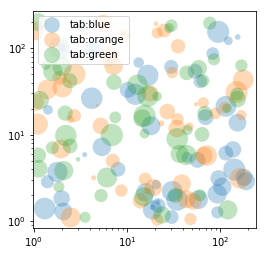

In [33]:
import matplotlib.pyplot as plt
import random
random.seed(20191126)
fig, ax = plt.subplots(figsize=(4, 4))
N = 50
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    x = [200**random.random() for i in range(N)]
    y = [200**random.random() for i in range(N)]
    scale = [500*random.random() for i in range(N)]
    ax.scatter(x,y,s=scale,c=color,label=color,alpha=0.3,edgecolors='none')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.show()

- `ax.set_xscale('log')` set the x-axis to log scaling. There are a few more options available on the [official document](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xscale.html#matplotlib.axes.Axes.set_xscale).

### About MINI project 1

Already available [lesson 9](http://www.it.uu.se/edu/course/homepage/prog1/english/lessons/le09/).

### NumPy, SciPy and Pandas

* [**NumPy**](https://numpy.org/) is a Python library for multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
* [**SciPy**](https://www.scipy.org/) is a Python library for scientific computing. It contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.
* [**Pandas**](https://pandas.pydata.org/) is a Python library for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series. 

**For the last MINI project, you need to install these libraries**